In [3]:
# Import data from excel sheet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.ticker import FormatStrFormatter
from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

file = 'TENSILE_TESTS_BASELINE_QUENCHED_SAMPLES.xlsm'   # Assign spreadsheet filename to `file`
xl = pd.ExcelFile(file)  # Load spreadsheet
print(xl.sheet_names)

['ALL DATA QUENCHED', 'Feuil1', 'ALL DATA', 'Normalized Data', 'ALL DATA QUENCHED for SciTech', 'ALL DATA QUENCHED for CJCW2018']


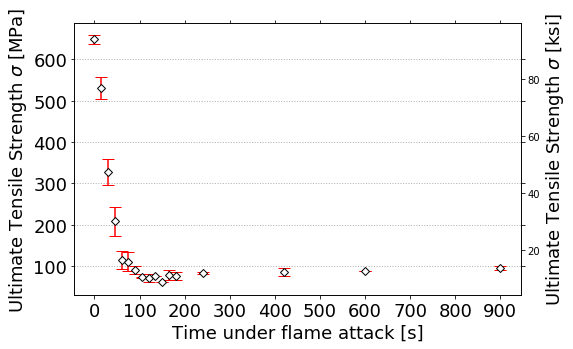

In [4]:
import xlrd
import pylab as plb

book = xlrd.open_workbook("TENSILE_TESTS_BASELINE_QUENCHED_SAMPLES.xlsm") #open our xls file, there's lots of extra default options in this call, for logging etc. take a look at the docs

######### Strength conversion
def C2F(strength):
    #Returns strength in ksi
    return (strength*0.1450377377)


def convert_ax2_to_F(ax1):
    #Update second axis according with first axis
    y1, y2 = ax1.get_ylim()
    ax2.set_ylim(C2F(y1), C2F(y2))
    ax2.figure.canvas.draw()
#########

fig, ax1 = plt.subplots(1,figsize=(8,5))
ax2 = ax1.twinx()


ax1.callbacks.connect("ylim_changed", convert_ax2_to_F)

plt.figure(1, figsize = (15,5))
sheet = book.sheet_by_index(0)


######### Bar definition
N = len(sheet.col_values(0))
strength_means = sheet.col_values(3)
strength_std = sheet.col_values(4)

ind = np.arange(N)  # the x locations for the groups
width = 0.45       # the width of the bars
##########


#REF. panel
#rects1 = ax1.bar(ind[np.arange(11)], (strength_means[0],strength_means[1],strength_means[2],strength_means[3], \
#                 strength_means[4],strength_means[5],strength_means[6],strength_means[7], \
#                 strength_means[8],strength_means[9],strength_means[10]), \
#                 width, color='silver', yerr=(strength_std[0],strength_std[1],strength_std[2],strength_std[3], \
#                                                strength_std[4],strength_std[5],strength_std[6],strength_std[7], \
#                                                strength_std[8],strength_std[9],strength_std[10]),capsize=2)

ax1.errorbar(sheet.col_values(0), sheet.col_values(3), sheet.col_values(4), color='red',linestyle='none',capsize=6, mfc='white', mec='black',marker='D')




# add some text for labels, title and axes ticks
ax1.set_xlabel('Time under flame attack [s]',fontsize=18)
ax1.set_ylabel('Ultimate Tensile Strength $\sigma$ [MPa]',fontsize=18)
ax2.set_ylabel('Ultimate Tensile Strength $\sigma$ [ksi]',fontsize=18)
#ax1.set_title('Baseline Material\'s Evolution of Ultimate Tensile Strength \n Under Fire Attack: 1100 °C (2000 °F) Methane flame')
#ax1.set_xticks(ind + width / 2)
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%g'))

#ax1.set_xticks(np.linspace(0, 150, 11))
ax1.set_xticks([0,100,200,300,400,500,600,700,800,900])
ax1.tick_params(axis='both', which='major', labelsize=18,right='on', top='on')
#ax1.set_xticklabels(sheet.col_values(0),rotation=0)
ax1.yaxis.grid(True,'major',linewidth=1,linestyle=":")

#ax1.legend((rects1, rects2, rects3, rects4, rects5, rects6, rects7, rects8, rects9, rects10), \
#          ('Reference', 'Reference + 1 GF','Baseline', 'Lockheed Martin ablatives/insulators', \
#           'FastBlock pre-ceramics', 'Intumescent paint', 'Silicone prepregs', 'Phenolic Prepregs', \
#           'FTI Group Phenolics', 'Mats/Felts/Others'),loc='lower left', bbox_to_anchor=(1.07, 0.25))


plt.show()
fig.savefig("Ultimate_Tensile_Strength_comparison_QUENCHED_Samples.pdf", bbox_inches = 'tight')


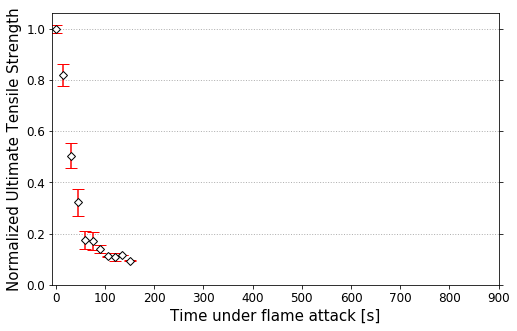

In [8]:
import xlrd
import pylab as plb

book = xlrd.open_workbook("TENSILE_TESTS_BASELINE_QUENCHED_SAMPLES.xlsm") #open our xls file, there's lots of extra default options in this call, for logging etc. take a look at the docs

######### Strength conversion
def C2F(strength):
    #Returns strength in ksi
    return (strength*0.1450377377)


def convert_ax2_to_F(ax1):
    #Update second axis according with first axis
    y1, y2 = ax1.get_ylim()
    ax2.set_ylim(C2F(y1), C2F(y2))
    ax2.figure.canvas.draw()
#########

fig, ax1 = plt.subplots(1,figsize=(8,5))
#ax2 = ax1.twinx()


#ax1.callbacks.connect("ylim_changed", convert_ax2_to_F)

plt.figure(1, figsize = (15,5))
sheet = book.sheet_by_index(5)


######### Bar definition
N = len(sheet.col_values(0))
strength_means = sheet.col_values(3)
strength_std = sheet.col_values(4)

ind = np.arange(N)  # the x locations for the groups
width = 0.45       # the width of the bars
##########


#REF. panel
#rects1 = ax1.bar(ind[np.arange(11)], (strength_means[0],strength_means[1],strength_means[2],strength_means[3], \
#                 strength_means[4],strength_means[5],strength_means[6],strength_means[7], \
#                 strength_means[8],strength_means[9],strength_means[10]), \
#                 width, color='silver', yerr=(strength_std[0],strength_std[1],strength_std[2],strength_std[3], \
#                                                strength_std[4],strength_std[5],strength_std[6],strength_std[7], \
#                                                strength_std[8],strength_std[9],strength_std[10]),capsize=2)

ax1.errorbar(sheet.col_values(0), sheet.col_values(6), sheet.col_values(7), color='red',linestyle='none',capsize=6, mfc='white', mec='black',marker='D')
#ax1.scatter(sheet.col_values(0), sheet.col_values(6),color='black',marker='D')



# add some text for labels, title and axes ticks
ax1.set_xlabel('Time under flame attack [s]',fontsize=15)
ax1.set_ylabel('Normalized Ultimate Tensile Strength',fontsize=15)
#ax2.set_ylabel('Ultimate Tensile Strength [ksi]')
#ax1.set_title('Baseline Material\'s Evolution of Ultimate Tensile Strength \n Under Fire Attack: 1100 °C (2000 °F) Methane flame')
#ax1.set_xticks(ind + width / 2)
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%g'))

#ax1.set_xticks(np.linspace(0, 150, 11))
#ax1.set_xticks([0,15,30,45,60,75,90,105,120,135,150])
ax1.set_xticks([0,100,200,300,400,500,600,700,800,900])
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax1.tick_params(axis='both', which='major', labelsize=12,right='on')
#ax1.set_xticklabels(sheet.col_values(0),rotation=0)
#ax1.yaxis.grid(True,'major',linewidth=1,linestyle=":")
ax1.yaxis.grid(True,'major',linewidth=1,linestyle=":")

#ax1.legend((rects1, rects2, rects3, rects4, rects5, rects6, rects7, rects8, rects9, rects10), \
#          ('Reference', 'Reference + 1 GF','Baseline', 'Lockheed Martin ablatives/insulators', \
#           'FastBlock pre-ceramics', 'Intumescent paint', 'Silicone prepregs', 'Phenolic Prepregs', \
#           'FTI Group Phenolics', 'Mats/Felts/Others'),loc='lower left', bbox_to_anchor=(1.07, 0.25))


plt.show()
fig.savefig("Ultimate_Tensile_Strength_comparison_QUENCHED_NORMALIZED.pdf", bbox_inches = 'tight')